In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5
 
# conecte-se ao MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()
 


In [16]:
# consultamos o estado e os parâmetros de conexão
mt5.terminal_info()

# obtemos informações sobre a versão do MetaTrader 5


TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=True, trade_allowed=True, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2485, maxbars=100000, codepage=1252, ping_last=16578, community_balance=0.0, retransmission=0.0, company='CLEAR CTVM S.A.', name='MetaTrader 5 Terminal', language='Portuguese (Brazil)', path='C:\\Program Files\\MetaTrader 5 Terminal', ...)

In [3]:
print(mt5.version())

(500, 2485, '05 Jun 2020')


In [17]:
win = mt5.copy_ticks_from('PETR4',datetime(2020,1,28,13),1000,mt5.COPY_TICKS_ALL)

In [18]:
win

array([(1580227200, 28.88, 28.89, 28.89,   100, 1580227200041,   2,   100.),
       (1580227200, 28.88, 28.89, 28.88,   100, 1580227200314, 344,   100.),
       (1580227201, 28.88, 28.89, 28.89,   100, 1580227201628, 312,   100.),
       (1580227201, 28.88, 28.89, 28.89,   100, 1580227201630, 312,   100.),
       (1580227204, 28.88, 28.89, 28.89,   100, 1580227204530, 312,   100.),
       (1580227205, 28.88, 28.89, 28.88,   500, 1580227205135, 344,   500.),
       (1580227205, 28.88, 28.89, 28.88,   200, 1580227205213, 344,   200.),
       (1580227205, 28.88, 28.89, 28.89,   200, 1580227205748, 312,   200.),
       (1580227205, 28.88, 28.89, 28.89,   100, 1580227205748, 312,   100.),
       (1580227205, 28.88, 28.89, 28.89,   100, 1580227205748, 312,   100.),
       (1580227205, 28.88, 28.89, 28.89,   100, 1580227205748, 312,   100.),
       (1580227205, 28.88, 28.89, 28.89,   300, 1580227205749, 312,   300.),
       (1580227206, 28.88, 28.89, 28.88,   100, 1580227206556, 344,   100.),

In [19]:
 
# solicitamos 1 000 ticks de EURAUD
euraud_ticks = mt5.copy_ticks_from("ITSA4", datetime(2020,1,28,13), 1000, mt5.COPY_TICKS_ALL)
# solicitamos ticks de AUDUSD no intervalo 2019.04.01 13:00 - 2019.04.02 13:00
audusd_ticks = mt5.copy_ticks_range("BIDI4", datetime(2020,1,27,13), datetime(2020,1,28,13), mt5.COPY_TICKS_ALL)


In [20]:
a = pd.DataFrame(euraud_ticks)
a

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,1580227200,13.18,13.19,13.18,300,1580227200041,2,300.0
1,1580227200,13.18,13.19,13.19,600,1580227200151,312,600.0
2,1580227200,13.18,13.19,13.18,200,1580227200210,344,200.0
3,1580227200,13.18,13.19,13.19,100,1580227200742,312,100.0
4,1580227209,13.18,13.19,13.18,100,1580227209517,344,100.0
...,...,...,...,...,...,...,...,...
995,1580228392,13.16,13.17,13.17,100,1580228392029,312,100.0
996,1580228392,13.16,13.17,13.16,100,1580228392239,344,100.0
997,1580228392,13.16,13.17,13.17,100,1580228392363,312,100.0
998,1580228394,13.16,13.17,13.17,100,1580228394381,312,100.0


In [21]:
 
# obtemos barras de vários instrumentos de diferentes maneiras
eurusd_rates = mt5.copy_rates_from("ITSA4", mt5.TIMEFRAME_M1, datetime(2020,1,28,13), 1000)
eurgbp_rates = mt5.copy_rates_from_pos("BIDI4", mt5.TIMEFRAME_M1, 0, 1000)
eurcad_rates = mt5.copy_rates_range("BIDI11", mt5.TIMEFRAME_M1, datetime(2020,1,27,13), datetime(2020,1,28,13))
eurusd_rates


array([(1579878180, 12.87, 12.88, 12.87, 12.88,  17, 1,    2600),
       (1579878240, 12.87, 12.88, 12.87, 12.88,  23, 1,    5300),
       (1579878300, 12.87, 12.88, 12.87, 12.87,  12, 1,    1600),
       (1579878360, 12.87, 12.88, 12.87, 12.87,  25, 1,   10500),
       (1579878420, 12.88, 12.88, 12.87, 12.88,  29, 1,   13700),
       (1579878480, 12.88, 12.89, 12.87, 12.88,  24, 1,    7700),
       (1579878540, 12.88, 12.89, 12.87, 12.87,  27, 1,    9400),
       (1579878600, 12.88, 12.89, 12.87, 12.89,  18, 1,    2000),
       (1579878660, 12.89, 12.89, 12.88, 12.89,  16, 1,    2100),
       (1579878720, 12.89, 12.89, 12.88, 12.89,  26, 1,   12200),
       (1579878780, 12.89, 12.89, 12.88, 12.88,  17, 1,    2700),
       (1579878840, 12.88, 12.89, 12.88, 12.89,  53, 1,   39600),
       (1579878900, 12.89, 12.89, 12.88, 12.89,  20, 1,    4300),
       (1579878960, 12.89, 12.89, 12.88, 12.89,  40, 1,   16300),
       (1579879020, 12.89, 12.89, 12.88, 12.89,  45, 1,   23300),
       (15

In [22]:
b = pd.DataFrame(eurusd_rates)
b

,time,open,high,low,close,tick_volume,spread,real_volume
0,1579878180,12.87,12.88,12.87,12.88,17,1,2600
1,1579878240,12.87,12.88,12.87,12.88,23,1,5300
2,1579878300,12.87,12.88,12.87,12.87,12,1,1600
3,1579878360,12.87,12.88,12.87,12.87,25,1,10500
4,1579878420,12.88,12.88,12.87,12.88,29,1,13700
...,...,...,...,...,...,...,...,...
995,1580226960,12.71,12.72,12.71,12.71,30,1,45400
996,1580227020,12.71,12.72,12.71,12.72,68,1,121200
997,1580227080,12.72,12.73,12.71,12.73,26,1,11300
998,1580227140,12.72,12.73,12.72,12.72,16,1,4500


euraud_ticks( 1000 )
(1580227200, 13.18, 13.19, 13.18, 300, 1580227200041, 2, 300.)
(1580227200, 13.18, 13.19, 13.19, 600, 1580227200151, 312, 600.)
(1580227200, 13.18, 13.19, 13.18, 200, 1580227200210, 344, 200.)
(1580227200, 13.18, 13.19, 13.19, 100, 1580227200742, 312, 100.)
(1580227209, 13.18, 13.19, 13.18, 100, 1580227209517, 344, 100.)
(1580227210, 13.18, 13.19, 13.19, 2000, 1580227210673, 312, 2000.)
(1580227215, 13.18, 13.19, 13.19, 700, 1580227215152, 312, 700.)
(1580227215, 13.18, 13.19, 13.19, 200, 1580227215183, 312, 200.)
(1580227215, 13.18, 13.19, 13.18, 200, 1580227215503, 344, 200.)
(1580227218, 13.18, 13.19, 13.19, 1200, 1580227218019, 312, 1200.)
audusd_ticks( 9263 )
(1580140801, 17.28, 17.29, 17.29, 100, 1580140801295, 312, 100.)
(1580140801, 17.28, 17.3, 17.29, 100, 1580140801295, 6, 100.)
(1580140801, 17.29, 17.3, 17.29, 100, 1580140801296, 2, 100.)
(1580140801, 17.29, 17.3, 17.3, 500, 1580140801299, 312, 500.)
(1580140801, 17.29, 17.3, 17.3, 100, 1580140801299, 31

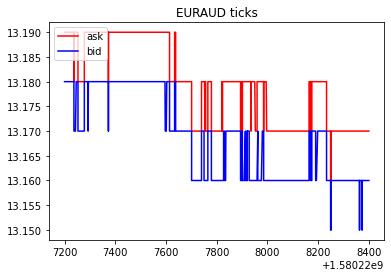

In [9]:
# concluímos a conexão ao MetaTrader 5
mt5.shutdown()
 
#DATA
print('euraud_ticks(', len(euraud_ticks), ')')
for val in euraud_ticks[:10]: print(val)
 
print('audusd_ticks(', len(audusd_ticks), ')')
for val in audusd_ticks[:10]: print(val)
 

#PLOT
# a partir dos dados recebidos criamos o DataFrame
ticks_frame = pd.DataFrame(euraud_ticks)
# plotamos os ticks no gráfico
plt.plot(ticks_frame['time'], ticks_frame['ask'], 'r-', label='ask')
plt.plot(ticks_frame['time'], ticks_frame['bid'], 'b-', label='bid')
 
# exibimos rótulos
plt.legend(loc='upper left')
 
# adicionamos cabeçalho
plt.title('EURAUD ticks')
 
# mostramos o gráfico
plt.show()

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=True, trade_allowed=True, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2485, maxbars=100000, codepage=1252, ping_last=16989, community_balance=0.0, retransmission=0.0, company='CLEAR CTVM S.A.', name='MetaTrader 5 Terminal', language='Portuguese (Brazil)', path='C:\\Program Files\\MetaTrader 5 Terminal', ...)
(500, 2485, '05 Jun 2020')
euraud_ticks( 1000 )
(1580227200, 13.18, 13.19, 13.18, 300, 1580227200041, 2, 300.)
(1580227200, 13.18, 13.19, 13.19, 600, 1580227200151, 312, 600.)
(1580227200, 13.18, 13.19, 13.18, 200, 1580227200210, 344, 200.)
(1580227200, 13.18, 13.19, 13.19, 100, 1580227200742, 312, 100.)
(1580227209, 13.18, 13.19, 13.18, 100, 1580227209517, 344, 100.)
(1580227210, 13.18, 13.19, 13.19, 2000, 1580227210673, 312, 2000.)
(1580227215, 13.18, 13.19, 13.19, 700, 1580227215152, 312, 700.)
(1580227215, 13.18, 13.1

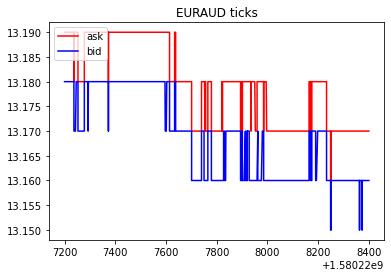

In [11]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5
 
# conecte-se ao MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()
 
# consultamos o estado e os parâmetros de conexão
print(mt5.terminal_info())
# obtemos informações sobre a versão do MetaTrader 5
print(mt5.version())
 
# solicitamos 1 000 ticks de EURAUD
euraud_ticks = mt5.copy_ticks_from("ITSA4", datetime(2020,1,28,13), 1000, mt5.COPY_TICKS_ALL)
# solicitamos ticks de AUDUSD no intervalo 2019.04.01 13:00 - 2019.04.02 13:00
audusd_ticks = mt5.copy_ticks_range("BBAS3", datetime(2020,1,27,13), datetime(2020,1,28,13), mt5.COPY_TICKS_ALL)
 
# obtemos barras de vários instrumentos de diferentes maneiras
eurusd_rates = mt5.copy_rates_from("BIDI4", mt5.TIMEFRAME_M1, datetime(2020,1,28,13), 1000)
eurgbp_rates = mt5.copy_rates_from_pos("ITSA3", mt5.TIMEFRAME_M1, 0, 1000)
eurcad_rates = mt5.copy_rates_range("IRBR3", mt5.TIMEFRAME_M1, datetime(2020,1,27,13), datetime(2020,1,28,13))
 
# concluímos a conexão ao MetaTrader 5
mt5.shutdown()
 
#DATA
print('euraud_ticks(', len(euraud_ticks), ')')
for val in euraud_ticks[:10]: print(val)
 
print('audusd_ticks(', len(audusd_ticks), ')')
for val in audusd_ticks[:10]: print(val)
 
print('eurusd_rates(', len(eurusd_rates), ')')
for val in eurusd_rates[:10]: print(val)
 
print('eurgbp_rates(', len(eurgbp_rates), ')')
for val in eurgbp_rates[:10]: print(val)
 
print('eurcad_rates(', len(eurcad_rates), ')')
for val in eurcad_rates[:10]: print(val)
 
#PLOT
# a partir dos dados recebidos criamos o DataFrame
ticks_frame = pd.DataFrame(euraud_ticks)
# plotamos os ticks no gráfico
plt.plot(ticks_frame['time'], ticks_frame['ask'], 'r-', label='ask')
plt.plot(ticks_frame['time'], ticks_frame['bid'], 'b-', label='bid')
 
# exibimos rótulos
plt.legend(loc='upper left')
 
# adicionamos cabeçalho
plt.title('EURAUD ticks')
 
# mostramos o gráfico
plt.show()